# Lecture 3: Introduction to Scikit-Learn

![](https://www.tensorflow.org/images/colab_logo_32px.png)
[Run in colab](https://colab.research.google.com/drive/1TZW7xcheEHt7DdDraOZUiSG92rqF3TGF)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2024-01-10 00:13:23


## Scikit-Learn overview

[Scikit-Learn](http://scikit-learn.org/stable/) is an extremely popular python machine learning package.

Provides implementations of a number of different machine learning algorithms.

- Clean, uniform and streamlined API.
- Useful and complete online documentation.
- Straightforward to switch models or algorithms.

Two main general concepts:
- Data representation
- Estimator API

## Data representations

### Scikit-Learn includes a number of example data-sets

In [2]:
from sklearn import datasets

In [3]:
# Type datasets.<TAB> to see more
#datasets.

### Data as a table

Best way to think about data in Scikit-Learn is in terms of tables of data.

Using the [`seaborn`](http://seaborn.pydata.org/) library we can read example data-sets as a Pandas `DataFrame`.

In [4]:
import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Iris data

Here we consider the [Iris flower data](https://en.wikipedia.org/wiki/Iris_flower_data_set).

- Introduced by statistician and biologist Ronald Fisher in 1936 paper.

- Consists of 50 samples of three different species of Iris (Iris Setosa, Iris Virginica and Iris Versicolor).

- Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. 


In [6]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


#### Parts of a flower

Measured flower [petals](https://en.wikipedia.org/wiki/Petal) and [sepals](https://en.wikipedia.org/wiki/Sepal).

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/Mature_flower_diagram.png" width="1000px" style="display:block; margin:auto"/>

[Image credit: [Mariana Ruiz](https://en.wikipedia.org/wiki/Sepal#/media/File:Mature_flower_diagram.svg)]

#### Images of different species

<!--
<table border="0" cellpadding="0">
  <tr>
    <td><center><img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/iris_setosa.jpg" width="60%"/></center></td>
    <td><center><img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/iris_versicolor.jpg" width="70%"/></center></td>
    <td><center><img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/iris_virginica.jpg" width="50%"/></center></td>
  </tr>
  <tr>
    <td><center>Iris Setosa</center></td>
    <td><center>Iris Versicolor</center></td>
    <td><center>Iris Virginica</center></td>    
  </tr>
</table>
-->

##### Iris Setosa

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/iris_setosa.jpg" width="300" style="display:block; margin:auto"/>

##### Iris Versicolor

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/iris_versicolor.jpg" width="300" style="display:block; margin:auto"/>

##### Iris Virginica

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/iris_virginica.jpg" width="300" style="display:block; margin:auto"/>

[[Image source](https://github.com/jakevdp/sklearn_tutorial)]


### Features matrix

Recall data represented to learning algorithm as "*features*".

Each row corresponds to an observed (*sampled*) flower, with a number of *features*.

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In this example we extract a feature matrix, removing species (which we want to predict).

In [8]:
X_iris = iris.drop('species', axis='columns')
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
type(X_iris)

pandas.core.frame.DataFrame

### Target array

Consider 1D *target array* containing labels or targets that we want to predict.

May be numerical values or discrete classes/labels.

In this example we want to predict the flower species from other measurements.

In [10]:
y_iris = iris['species']
y_iris.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [11]:
type(y_iris)

pandas.core.series.Series

### Features matrix and target vector

<img src="https://raw.githubusercontent.com/astro-informatics/course_mlbd_images/master/Lecture03_Images/data-layout.png" alt="data-layout" width="500" style="display:block; margin:auto"/>

[[Image source](https://github.com/jakevdp/sklearn_tutorial)]

In [12]:
X_iris.shape

(150, 4)

In [13]:
y_iris.shape

(150,)

### Visualizing the data

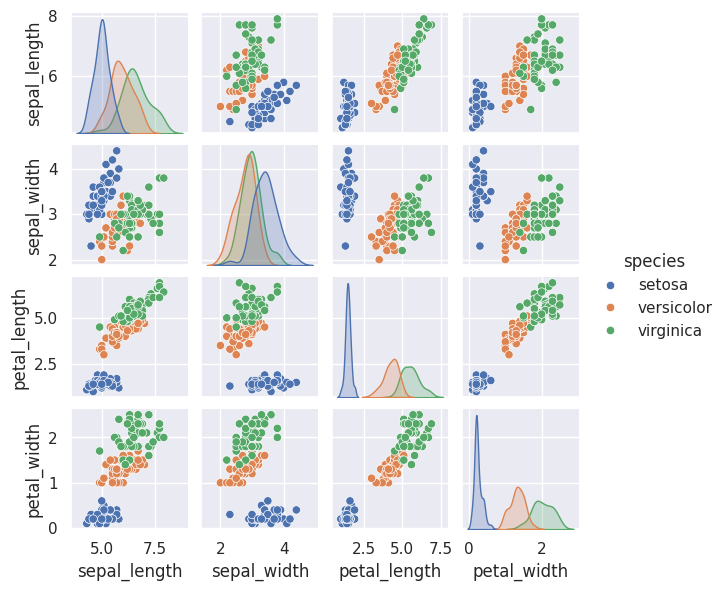

In [14]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);


How well do you expect classification to perform with these features and why?

Fairly well since the different classes are reasonably well separated in feature space.

## Scikit-Learn's Estimator API

### Scikit-Learn API design principles

- Consistency: All objects share a common interface.
- Inspection: All specified parameter values exposed as public attributes.
- Limited object hierarchy: Only algorithms are represented by Python classes; data-sets/parameters represented in standard formats.
- Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms.
- Sensible defaults: Library defines appropriate default value.

### Impact of design principles

- Makes Scikit-Learn easy to use, once the basic principles are understood. 
- Every machine learning algorithm in Scikit-Learn implemented via the Estimator API.
- Provides a consistent interface for a wide range of machine learning applications.

### Typical Scikit-Learn Estimator API steps

1. Choose a class of model (import appropriate estimator class).
2. Choose model hyperparameters (instantiate class with desired values).
3. Arrange data into a features matrix and target vector.
4. Fit the model to data (calling `fit` method of model instance).
5. Apply model to new data:
   - Supervised learning: often predict targets for unknown data using the `predict` method.
   - For unsupervised learning: often transform or infer properties of the data using the `transform` or `predict` method.

## Linear regression as machine learning

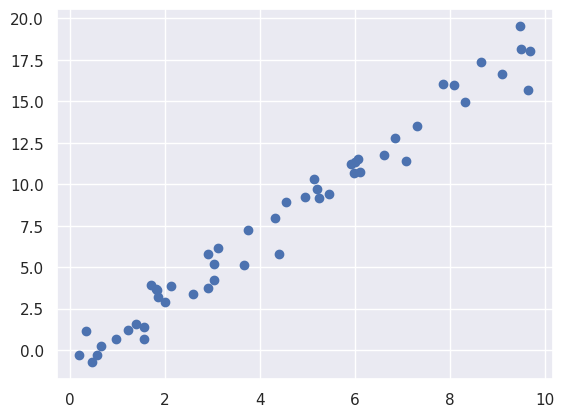

In [15]:
import matplotlib.pyplot as plt
import numpy as np

n_samples = 50
rng = np.random.RandomState(42)
x = 10 * rng.rand(n_samples)
y = 2 * x - 1 + rng.randn(n_samples)
plt.scatter(x, y);

### 1. Choose a class of model

Every class of model is represented by a Python class.

In [16]:
from sklearn.linear_model import LinearRegression

### 2. Choose model hyperparameters

Make instance of model with defined hyperparameters (e.g. y-intersect, regularization).

In [17]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### 3. Arrange data into a features matrix and target vector

In [18]:
X = x.reshape(n_samples,1)
X.shape

(50, 1)

In [19]:
y.shape 

(50,)

### 4. Fit the model to data


In [20]:
model.fit(X, y)

LinearRegression()

All model parameters that were learned during the `fit()` process have *trailing underscores*.

In [21]:
model.intercept_

-0.9033107255311146

In [22]:
model.coef_

array([1.9776566])

Intercept and slope are close to the model used to generate the data (-1 and 2 respectively).

### 5. Predict targets for unknown data

In [23]:
n_fit = 50
xfit = np.linspace(-1, 11, n_fit)
Xfit = xfit.reshape(n_fit,1)
yfit = model.predict(Xfit)

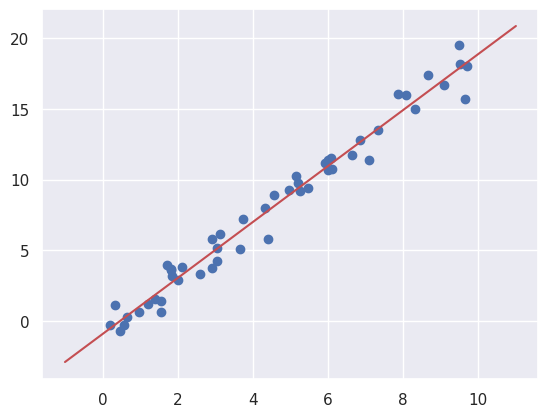

In [24]:
plt.scatter(x, y)
plt.plot(xfit, yfit, 'r');

## Supervised learning: classification

Consider Iris data-set  and predict species.

Split data into training and test sets (hint: [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) is a convenient scikit-learn function for this task).

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.5, random_state=1)

In [26]:
X_train.head() 

,sepal_length,sepal_width,petal_length,petal_width
74,6.4,2.9,4.3,1.3
116,6.5,3.0,5.5,1.8
93,5.0,2.3,3.3,1.0
100,6.3,3.3,6.0,2.5
89,5.5,2.5,4.0,1.3



Use a Gaussian Naive Bayes (`GaussianNB`) model to predict Iris species.  Then evaluate performance on test data.

(Hint: choose, instantiate, fit and predict.) 

See Scikit-Learn documentation on [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

Evaluate performance using simple [`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score).

(Do not set any priors.)

In [27]:
from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. instantiate model
model.fit(X_train, y_train)                 # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data

Evaluate performance on test data.

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.96

## Unsupervised learning: dimensionality reduction

Reduce dimensionality of Iris data for visualisation or to discover structure.

Recall the original Iris data has four features.

In [29]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
X_iris.shape

(150, 4)

Compute principle component analysis (`PCA`), with 2 components, and apply transform.  Plot data in PCA space. 

(Hint: choose, instantiate, fit and transform.)

See Scikit-Learn documentation on [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

See Seaborn documentation on [`lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

In [31]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions 

In [32]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
iris.head() 

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


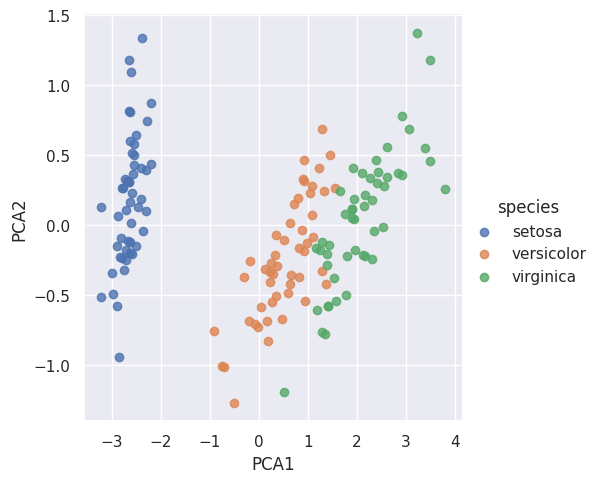

In [33]:
sns.lmplot(data=iris, x="PCA1", y="PCA2", hue='species', fit_reg=False);

How well do you expect classification to perform using PCA components as features and why?

Very well since the different classes are well separated in PCA feature space.

## Unsupervised learning: clustering

Attempt to find "groups" in Iris data without given labels or training data.


 
Cluster Iris data into 3 components using Gaussian Mixture Model (GMM).  Plot the 3 components separately in PCA space.

(Hint: choose, instantiate, fit and predict.)

See Scikit-Learn documentation on [`GaussianMixture`](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).

In [34]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3)          # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                                # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)                    # 4. Determine cluster labels

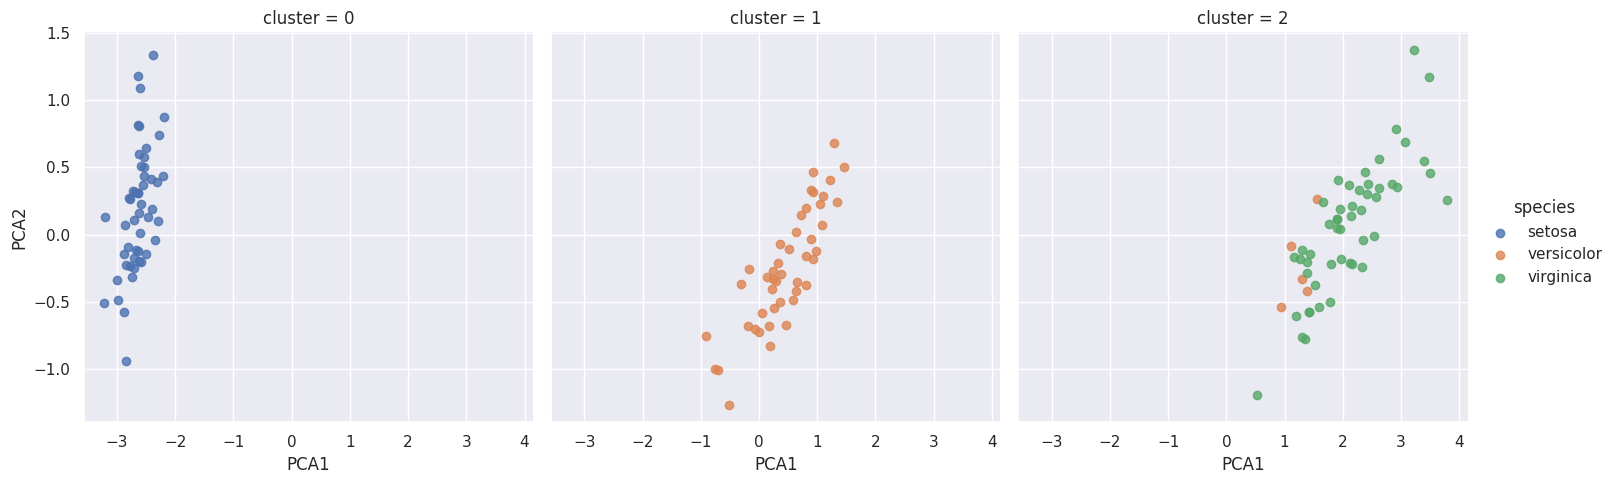

In [35]:
iris['cluster'] = y_gmm
sns.lmplot(data=iris, x="PCA1", y="PCA2", hue='species',
           col='cluster', fit_reg=False);

The GMM has done a reasonably good job of separating the different classes.  Setosa is perfectly separated in one cluster, while there remains some mixing between versicolor and viginica.

**Exercises:** *You can now complete Exercise 1 in the exercises associated with this lecture.*